<a href="https://colab.research.google.com/github/bharatb964/Intel-Scene-Classification/blob/master/anaytics_vidya_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the data...

In [0]:
!curl 'https://datahack-prod.s3.amazonaws.com/test_file/test_WyRytb0.csv' -H 'Upgrade-Insecure-Requests: 1' -H 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36' -H 'Referer: https://datahack.analyticsvidhya.com/contest/practice-problem-intel-scene-classification-challe/' --compressed -o test.csv
!curl 'https://doc-0s-5o-docs.googleusercontent.com/docs/securesc/k943n5cp4emg05t1h4btbg0rau9hv9ai/6l3j39ha1nmo6rr09j6ddj0jjfc735la/1553947200000/15249538500823033517/13761418364707206314/10qN7OUzTutCg8ruwFosml0xzi0elsI5N?e=download&nonce=cfq4hif11a9me&user=13761418364707206314&hash=0439nk2p3pi2618ijkhp27kfik1hdebu' -H 'authority: doc-0s-5o-docs.googleusercontent.com' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'x-client-data: CIm2yQEIo7bJAQjEtskBCKmdygEIqKPKAQixp8oBCOKoygE=' -H 'referer: https://drive.google.com/uc?id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N&export=download' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-GB,en-US;q=0.9,en;q=0.8' -H 'cookie: AUTH_nf5ch1gual3hcccq6lpkvtu578cpdvn0_nonce=cfq4hif11a9me' --compressed -o train.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 69660  100 69660    0     0  75064      0 --:--:-- --:--:-- --:--:-- 74983
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [2]:
!curl 'https://storage.googleapis.com/kaggle-datasets/89296/206037/scene-classification.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1554742844&Signature=q%2F5%2FndJ2iJ5v9p%2Fv2E6seVOivFnnomYq8qd%2Byr7ayUCBkOzF6F6mZDF7mVgYnRNxGlXWIK6q24%2F70bnFJZ54T1s8ZN1oGu89uelQX20QKQz94zy%2FkySqiHuMAxHswvU%2FvO1t4TBy%2BpzQqe%2FmS9tNFuO1IplM6nke896UDPDtSVJcXE47HWMDdeL9pIaWUk8iVNaUftaNINqL0JokbA7NgVic24dYYWSjlGKZbPQLYXNFX%2FDHXM2udufGvSIKmpMmqJbW5WOWhUSxST4Iet3NaymZmY7YmeCxolHZZbq9zG4Xfqdcku2IA%2FZjm83W9PCCLXRsXD5Hpfd7M3zHKwH4ug%3D%3D' -H 'authority: storage.googleapis.com' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'referer: https://www.kaggle.com/' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-GB,en-US;q=0.9,en;q=0.8' --compressed -o data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  357M  100  357M    0     0  30.4M      0  0:00:11  0:00:11 --:--:-- 38.0M


In [0]:
import zipfile
with zipfile.ZipFile("train-scene classification.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [0]:
import fastai
from fastai.vision import *

Create train and test folder so that fastai can read the files

In [0]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
from shutil import move
from shutil import rmtree
#rmtree('./test')
os.mkdir('./test')
for file in list(test.image_name):
   move('./train/{}'.format(file), './test/{}'.format(file))

Lets do a grid search for different hyprerparameters of resnet18 model

In [0]:
# bunch=[0,0,0,0,0]
# tfms=get_transforms()
# tfms1=get_transforms(flip_vert=True)
# tfms2=get_transforms(flip_vert=True,max_rotate=25)
# bunch[0]=ImageDataBunch.from_csv('.',csv_labels='train.csv',folder='./train',size=150,valid_pct=0.2,test='./test')
# bunch[1]=ImageDataBunch.from_csv('.',csv_labels='train.csv',folder='./train',size=150,ds_tfms=tfms,valid_pct=0.2,test='./test')
# bunch[2]=ImageDataBunch.from_csv('.',csv_labels='train.csv',folder='./train',size=150,ds_tfms=tfms1,valid_pct=0.2,test='./test')
# bunch[3]=ImageDataBunch.from_csv('.',csv_labels='train.csv',folder='./train',size=150,ds_tfms=tfms2,valid_pct=0.2,test='./test')
# bunch[4]=ImageDataBunch.from_csv('.',csv_labels='train.csv',folder='./train',size=240,valid_pct=0.2,test='./test')

# for i in range(4):
#   learn = cnn_learner(bunch[i], models.resnet18, metrics=accuracy)
#   #learn.unfreeze()
#   learn.fit(10)
#   print(f'for bunch {i} the minimum loss is {min(learn.recorder.val_losses)}')
#   with open('results.txt','a') as res:
#     res.write(f'for bunch {i} the minimum loss is {min(learn.recorder.val_losses)}')

Lets do the final training...

In [10]:
tfms=get_transforms(max_rotate=0,max_zoom=1.5)
bunch=ImageDataBunch.from_csv('.',csv_labels='train.csv',folder='./train',size=150,ds_tfms=tfms,valid_pct=0.2,test='./test')
learn = cnn_learner(bunch, models.resnet18, metrics=accuracy)
#learn.unfreeze()
learn.fit(5)
learn.save('vgg')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 84521095.73it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.401905,0.283862,0.900176,01:17
1,0.333285,0.279522,0.896359,01:16
2,0.307630,0.256649,0.903699,01:16
3,0.286268,0.229067,0.915737,01:16
4,0.268834,0.229559,0.913975,01:16


In [21]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


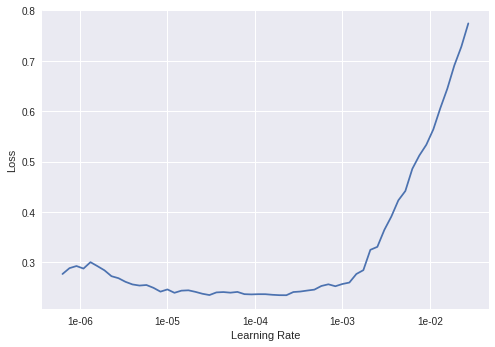

In [22]:
learn.recorder.plot()

Interpretation of results

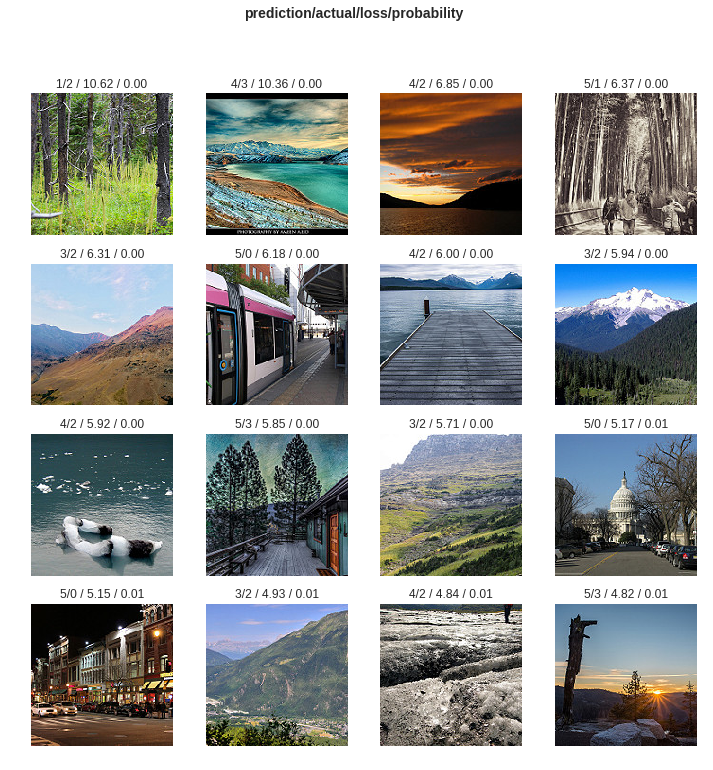

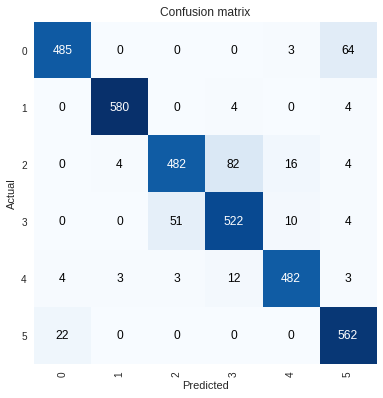

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(16, figsize=(12,12),heatmap=False)
interp.plot_confusion_matrix()

In [13]:
interp.most_confused()

[(2, 3, 82),
 (0, 5, 64),
 (3, 2, 51),
 (5, 0, 22),
 (2, 4, 16),
 (4, 3, 12),
 (3, 4, 10),
 (1, 3, 4),
 (1, 5, 4),
 (2, 1, 4),
 (2, 5, 4),
 (3, 5, 4),
 (4, 0, 4),
 (0, 4, 3),
 (4, 1, 3),
 (4, 2, 3),
 (4, 5, 3)]

3380 misclassified samples over 3406 samples in the validation set.


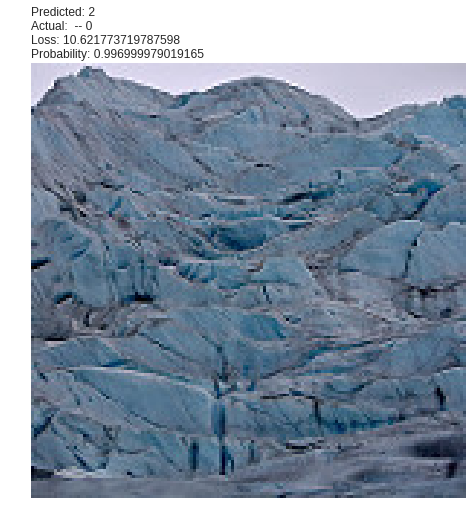

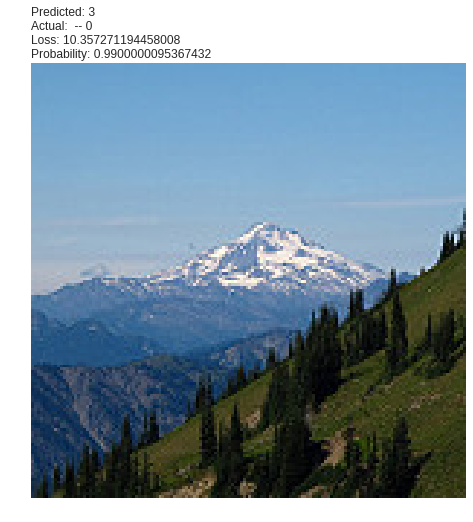

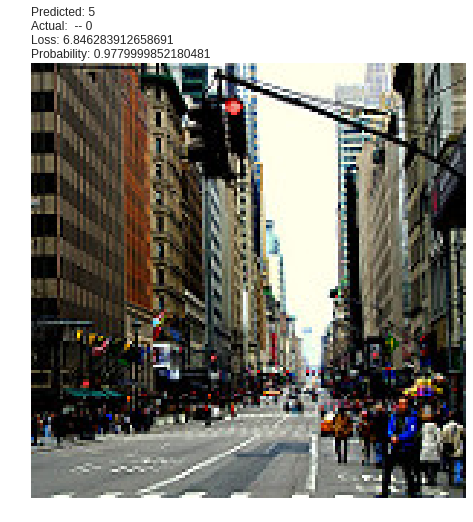

In [14]:
interp.plot_multi_top_losses()

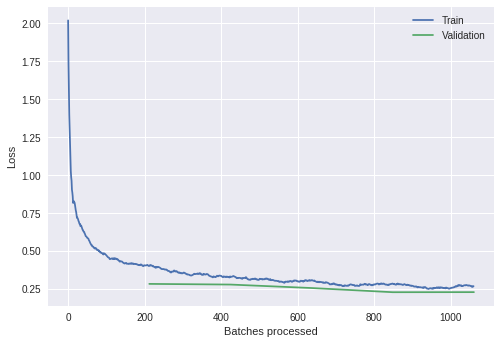

In [15]:
learn.recorder.plot_losses()

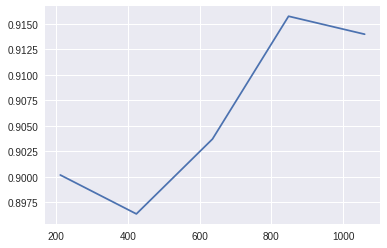

In [16]:
learn.recorder.plot_metrics()

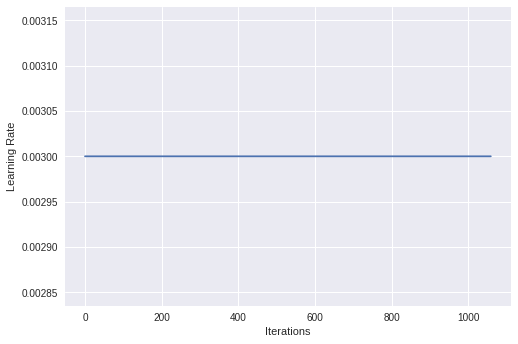

In [18]:
learn.recorder.plot_lr()

Code to prepare submission file and download from google colab...

In [0]:
#from google.colab import files
def save_results(bunch,learn):
  res=learn.get_preds(ds_type=DatasetType.Test)
  results=pd.DataFrame()
  results['image_name']=bunch.test_ds.x.items
  results['label']=res[0]
  results['label']=results.apply(lambda x:np.argmax(list(x['label'])),axis=1)
  results['image_name']=results['image_name'].astype(str).str.split('/').str[1]
  results.to_csv('results.csv',index=None)
  #files.download('results.csv') 
  return results

In [0]:
save_results(bunch,learn)

,image_name,label
0,22981.jpg,2
1,10017.jpg,3
2,20923.jpg,1
3,7133.jpg,4
4,12854.jpg,3
5,5961.jpg,5
6,8851.jpg,2
7,21039.jpg,0
8,7988.jpg,1
9,3642.jpg,1


In [0]:
learn.save('vgg')

In [0]:
with open('abc.txt','w') as abc:
  abc.write('a')

In [0]:
from google.colab import files


In [0]:
files.download('abc.txt')